In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
meas = pd.read_csv("measurements.csv").set_index('sweep')

In [41]:
meas2 = pd.read_csv("measurements.csv").set_index('sweep')

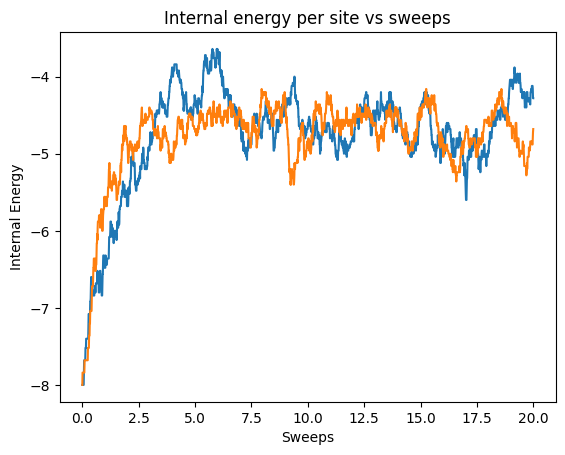

In [46]:
plt.plot(meas.energy)
plt.plot(meas2.energy)
plt.title("Internal energy per site vs sweeps")
plt.xlabel("Sweeps")
plt.ylabel("Internal Energy")
plt.savefig("equilipration.png")
plt.show()

In [317]:
def TDAC(series, t):
    tmax = len(series)
    series = np.ravel(series)
    DT = tmax - t
    sum1 = np.sum(series[:tmax-t+1] * series[t:tmax+1])
    sum2 = np.sum(series[:tmax-t+1])
    sum3 = np.sum(series[t:tmax+1])
    return sum1 / DT - sum2 * sum3 / pow(DT,2)

In [319]:
TEMPERATURES = [1 + i / 10 for i in range(81)]
energy_means = []
energy_vars = []
magnetisation_means = []
magnetisation_vars = []
int_corr_times = []
for TEMPERATURE in [1, 2, 2.3, 5.2, 7]:
    measurements = pd.read_csv("measurement_" + str(int(10 * TEMPERATURE)) + ".csv" )
    measurements = measurements[measurements.sweep  > 1000]
    chis = np.array([TDAC(measurements.magnetisation, t) for t in range(int(0.8 * len(measurements.magnetisation)))])
    chis /= chis[0]
    plt.plot(chis, label = TEMPERATURE)
    int_corr_times.append(np.sum(chis))
    energy_means.append(np.mean(measurements.energy))
    energy_vars.append(np.var(measurements.energy))
    magnetisation_means.append(np.mean(measurements.magnetisation))
    magnetisation_vars.append(np.var(measurements.magnetisation))

plt.xlabel("Sweeps")
plt.ylabel("Time Displaced Magnetisation")
plt.legend()
plt.savefig("chis.png")
plt.show()

ValueError: operands could not be broadcast together with shapes (1222,) (1221,) 

In [270]:
stats = pd.DataFrame({"temperature" : TEMPERATURES, "energy_mean": energy_means, "energy_var" : energy_vars,
              "magn_mean" : magnetisation_means, "magn_var" : magnetisation_vars,
                      "int_corr_time" : int_corr_times})

In [273]:
stats = stats.set_index('temperature')

stats["specific_heat"] = stats.energy_var / (900 * (stats.index ** 2))
stats["magn_suscept"] = 900 * stats.magn_var / stats.index

print(f"Temperature of maximum energy variance: {stats.specific_heat.idxmax()}")
print(f"Temperature of maximum magnetisation variance: {stats.magn_suscept.idxmax()}")

Temperature of maximum energy variance: 5.2
Temperature of maximum magnetisation variance: 5.3


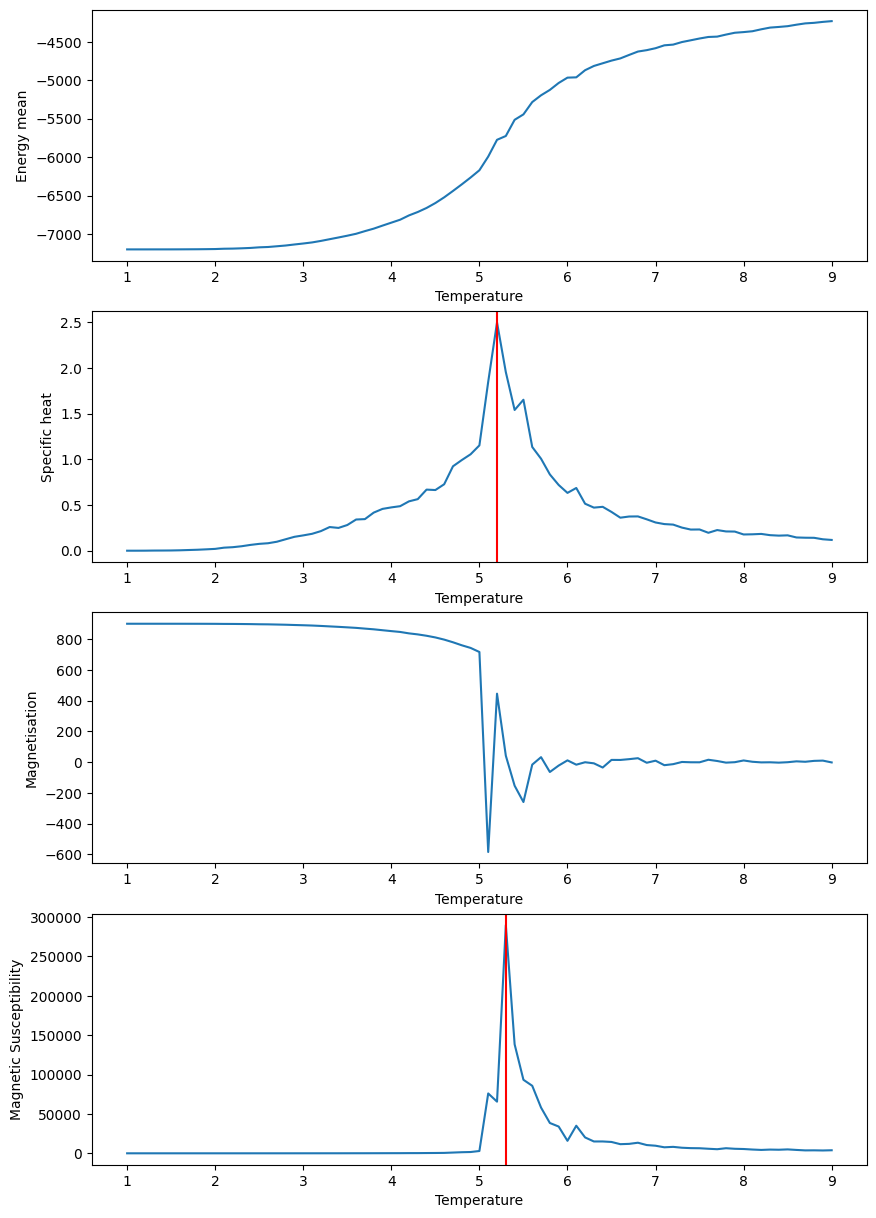

In [227]:
fig, axes= plt.subplots(nrows=4, figsize=(10, 15))
axes[0].plot(stats.index, stats.energy_mean)
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Energy mean")

axes[1].plot(stats.index, stats.specific_heat)
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("Specific heat")
axes[1].axvline(x = stats.specific_heat.idxmax(), c = 'r')

axes[2].plot(stats.index, stats.magn_mean)
axes[2].set_xlabel("Temperature")
axes[2].set_ylabel("Magnetisation")

axes[3].plot(stats.index, stats.magn_var)
axes[3].set_xlabel("Temperature")
axes[3].set_ylabel("Magnetic Susceptibility")
axes[3].axvline(x = stats.magn_suscept.idxmax(), c = 'r')

plt.savefig("stats.png")
plt.show()

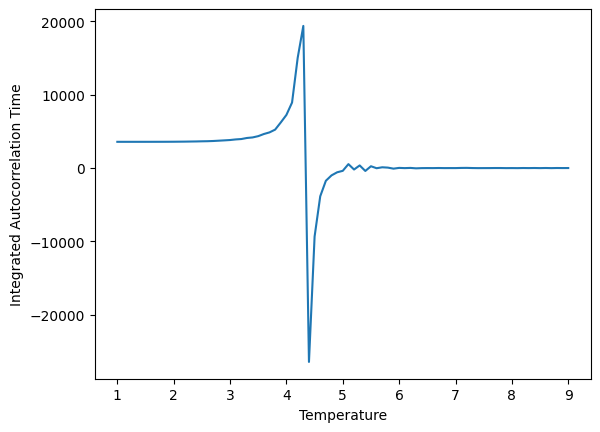

In [278]:
stats.int_corr_time.plot()
plt.xlabel('Temperature')
plt.ylabel('Integrated Autocorrelation Time')
plt.savefig('IAT')
plt.show()

In [320]:
stats.int_corr_time

temperature
1.0    3573.556949
1.1    3573.556949
1.2    3573.588443
1.3    3573.827581
1.4    3573.934085
          ...     
8.6       7.136104
8.7      -8.910567
8.8       6.119326
8.9      -0.838482
9.0       2.591748
Name: int_corr_time, Length: 81, dtype: float64

In [339]:
meas = pd.read_csv('measurement_.csv')
print(meas.energy.value_counts())
print(meas.magnetisation.value_counts())
meas.temperature.values

energy
-7200    932499
-7184        91
Name: count, dtype: int64
magnetisation
900    932499
898        91
Name: count, dtype: int64


array([1.  , 1.  , 1.  , ..., 3.05, 3.05, 3.05])